In [243]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import re
from wordcloud import STOPWORDS,WordCloud
import matplotlib.pyplot as plt


from clean_tweets_dataframe import Clean_Tweets


In [244]:
CSV_PATH = "../processed_tweet_data.csv"
CLEANED_SAVE_PATH = "../cleaned_tweet_data.csv"

In [220]:
# PreProcessing

In [221]:
# taking a csv file path and reading a dataframe

def read_proccessed_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    except FileNotFoundError:
        print("file not found")
    
    

In [222]:
# replacing hash tags  starting by @ and links
def clean_text(text):
    hash_tag_removed = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', text)
    hash_tag_removed = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', text)

    removed_links = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text, flags=re.MULTILINE)
    cleaned = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', removed_links)
    return cleaned

In [223]:
def preprocess_and_clean(df: pd.DataFrame, save=False) -> pd.DataFrame:
    
    Tweet_cleaner = Clean_Tweets(df)
    
    df = Tweet_cleaner.drop_duplicate(df)
    
    df = Tweet_cleaner.drop_unwanted_column(df)
    
    df = Tweet_cleaner.drop_unwanted_column(df)
    
    df = Tweet_cleaner.convert_to_datetime(df)
    
    df = Tweet_cleaner.convert_to_numbers(df)
    
    df = Tweet_cleaner.remove_non_english_tweets(df)
    
    
    df['clean_text']= df['original_text'].astype(str)
    df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())
    
    df['clean_text']  = df['clean_text'].apply(clean_text)

    
    
    print("data cleaned...")
    print(df)
    
    if save:
        try: 
            df.to_csv(CLEANED_SAVE_PATH, index=False)
            print('File Successfully Saved.!!!')
        
        except Exception:
            print("Save failed...")
    
    return df
            


    
    
    

In [224]:
def get_data_info(tweet_df: pd.DataFrame):
    
    row_count, col_count = tweet_df.shape
    
    print(f"Number of rows: {row_count}")
    print(f"Number of columns: {col_count}")

    return tweet_df.info()
    

In [225]:
tweet_df = read_proccessed_data(CSV_PATH)
get_data_info(tweet_df)

file read as csv
Number of rows: 6532
Number of columns: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      6532 non-null   int64  
 7   retweet_count       4785 non-null   float64
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  0 non-null      float64
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               4088 non-null   object 


In [226]:
tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612.0,ketuesriche,551,351,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92.0,Grid1949,66,92,NaN,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1.0,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",NaN
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899.0,RIPNY08,2666,2704,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",NaN
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20.0,pash22,28250,30819,NaN,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom


In [227]:
tweet_df['lang'].value_counts()

en    6532
Name: lang, dtype: int64

In [228]:
get_data_info(tweet_df)

Number of rows: 6532
Number of columns: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      6532 non-null   int64  
 7   retweet_count       4785 non-null   float64
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  0 non-null      float64
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               4088 non-null   object 
dtypes: float64(4

In [229]:
preprocess_and_clean(tweet_df, True)

Automation in Action...!!!


/Users/daniel/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


data cleaned...
                    created_at  \
0    2021-06-18 17:55:49+00:00   
1    2021-06-18 17:55:59+00:00   
2    2021-06-18 17:56:07+00:00   
3    2021-06-18 17:56:10+00:00   
4    2021-06-18 17:56:20+00:00   
...                        ...   
6527 2021-06-19 07:41:15+00:00   
6528 2021-06-19 07:41:26+00:00   
6529 2021-06-19 07:41:31+00:00   
6530 2021-06-19 07:41:45+00:00   
6531 2021-06-19 07:41:54+00:00   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="https://mobile.twitter.com" rel="nofo...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="https://mobile.twitter.com" rel="nofo...   
4     <a href="http://twitter.com/download/android" ...   
...                                                 ...   
6527  <a href="http://twitter.com/download/android" ...   
6528  <a href="http://twitter.com/download/android" ...   
6529  <a href="http://twitter.com/download/i

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,friends_count,clean_text
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612.0,ketuesriche,551,351,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,0.166667,"🚨africa is ""in the midst of a full-blown third..."
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92.0,Grid1949,66,92,NaN,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",0.133333,"dr moeti is head of who in africa, and one of ..."
2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1.0,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",NaN,0.316667,thank you for creating this amazing campaign ...
3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899.0,RIPNY08,2666,2704,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",NaN,0.086111,"former pfizer vp and virologist, dr. michael y..."
4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20.0,pash22,28250,30819,NaN,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,0.280000,i think it’s important that we don’t sell cova...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,2021-06-19 07:41:15+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @Givenkazeni: Zweli please just release the...,0.000000,0.400000,en,188,54.0,Mthatos_Vivi,447,1089,NaN,[],"[{'screen_name': 'Givenkazeni', 'name': 'le’Gi...",NaN,0.000000,rt : zweli please just release the graphic des...
6528,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1595,908.0,wayno_af007,2224,2739,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...","The boro, MA",0.086111,"former pfizer vp and virologist, dr. michael y..."
6529,2021-06-19 07:41:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...","@Jenfeds73 @DcrInYYC Respectfully, veterinaria...",0.281250,0.506250,en,0,NaN,dublonothing,3000,4709,NaN,[],"[{'screen_name': 'Jenfeds73', 'name': 'Bubs 🇨🇦...","Los Angeles, CA",0.281250,"respectfully, veterinarians have to have a b..."
6530,2021-06-19 07:41:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Africa needs millions more doses here &amp; n...",0.125000,0.325000,en,143,122.0,DrAmirKhanGP,135163,1284,NaN,"[{'text': 'COVID19', 'indices': [120, 128]}]","[{'screen_name': 'WHOAFRO', 'name': 'WHO Afric...",Yorkshire and The Humber,0.125000,"""africa needs millions more doses here &amp; n..."


In [230]:
class TweeterDataExplorator:
    
    def __init__(self, df):
        
        self.df = df
    
    def read_head(self):
        return self.df.head()
    
    def get_info(self):
        row_count, col_count = self.df.shape
    
        print(f"Number of rows: {row_count}")
        print(f"Number of columns: {col_count}")

        return (row_count, col_count), self.df.info()
    
    def get_count(self, column_name):
        return self.df[column_name].value_counts()
    
    def get_polarities_count(self):
        postive_count = tweet_df[tweet_df['polarity'] > 0].shape[0]
        neutral_count = tweet_df[tweet_df['polarity'] == 0].shape[0]
        negative_count = tweet_df[tweet_df['polarity'] < 0].shape[0]
        
        return {"postive": postive_count, "neutral": neutral_count, "negative": negative_count}

        
    
    def get_hash_tag_df(self):        
        hash_tags = self.df.clean_text.apply(self.__find_hashtags)
        
        flattened_hash_tags = []
        
        for hash_tag_list in hash_tags:
            for hash_tag in hash_tag_list:
                flattened_hash_tags.append(hash_tag)
        
        hashtag_df = pd.DataFrame(columns=['hashtag'])
        hashtag_df['hashtag'] = flattened_hash_tags
        
        return hashtag_df
    
    def most_used_hash_tag(self, top=None):
        return self.get_hash_tag_df()['hashtag'].value_counts().head(top)
        
    def visualze_polarity(self):
        return 
    
    def most_used_language(self, top=None):
        return self.df['lang'].value_counts().head(top)
    
    def authors(self, top=None):
        
        return self.df['original_author'].value_counts().head(top)
    
    
    def most_retweeted_tweet(self):
        pass
    
    def __find_hashtags(self, tweet):
        
        try:
            return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
        except:
            return []

In [231]:
cleaned_tweet_df = read_proccessed_data(CLEANED_SAVE_PATH)
tweeterDataExplorator = TweeterDataExplorator(cleaned_tweet_df)

file read as csv


In [232]:
cleaned_tweet_df

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,friends_count,clean_text
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612.0,ketuesriche,551,351,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,0.166667,"🚨africa is ""in the midst of a full-blown third..."
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92.0,Grid1949,66,92,NaN,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",0.133333,"dr moeti is head of who in africa, and one of ..."
2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1.0,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",NaN,0.316667,thank you for creating this amazing campaign ...
3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899.0,RIPNY08,2666,2704,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",NaN,0.086111,"former pfizer vp and virologist, dr. michael y..."
4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20.0,pash22,28250,30819,NaN,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,0.280000,i think it’s important that we don’t sell cova...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,2021-06-19 07:41:15+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @Givenkazeni: Zweli please just release the...,0.000000,0.400000,en,188,54.0,Mthatos_Vivi,447,1089,NaN,[],"[{'screen_name': 'Givenkazeni', 'name': 'le’Gi...",NaN,0.000000,rt : zweli please just release the graphic des...
6528,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1595,908.0,wayno_af007,2224,2739,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...","The boro, MA",0.086111,"former pfizer vp and virologist, dr. michael y..."
6529,2021-06-19 07:41:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...","@Jenfeds73 @DcrInYYC Respectfully, veterinaria...",0.281250,0.506250,en,0,NaN,dublonothing,3000,4709,NaN,[],"[{'screen_name': 'Jenfeds73', 'name': 'Bubs 🇨🇦...","Los Angeles, CA",0.281250,"respectfully, veterinarians have to have a b..."
6530,2021-06-19 07:41:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Africa needs millions more doses here &amp; n...",0.125000,0.325000,en,143,122.0,DrAmirKhanGP,135163,1284,NaN,"[{'text': 'COVID19', 'indices': [120, 128]}]","[{'screen_name': 'WHOAFRO', 'name': 'WHO Afric...",Yorkshire and The Humber,0.125000,"""africa needs millions more doses here &amp; n..."


In [233]:
tweeterDataExplorator.get_info()

Number of rows: 6532
Number of columns: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      6532 non-null   int64  
 7   retweet_count       4785 non-null   float64
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  0 non-null      float64
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               4088 non-null   object 
 15  friends_coun

((6532, 17), None)

In [234]:
polaritites_count = tweeterDataExplorator.get_polarities_count()
print(f"postive: { polaritites_count['postive'] }")
print(f"negative: { polaritites_count['negative'] }")
print(f"neutal: { polaritites_count['neutral'] }")

postive: 3426
negative: 1277
neutal: 1829


In [235]:
top_ten_hash_tags_used = tweeterDataExplorator.most_used_hash_tag(5)
top_ten_hash_tags_used

#covid19        2938
#vaccines        265
#africa          190
#coronavirus     169
#wecandothis     153
Name: hashtag, dtype: int64

In [236]:
top_ten_authors = tweeterDataExplorator.authors(5)
top_ten_authors

PuneUpdater        530
viralvideovlogs     45
WHO__India          27
Signal__Pump        27
Rosenchild          11
Name: original_author, dtype: int64

In [237]:
# VISUALZATION

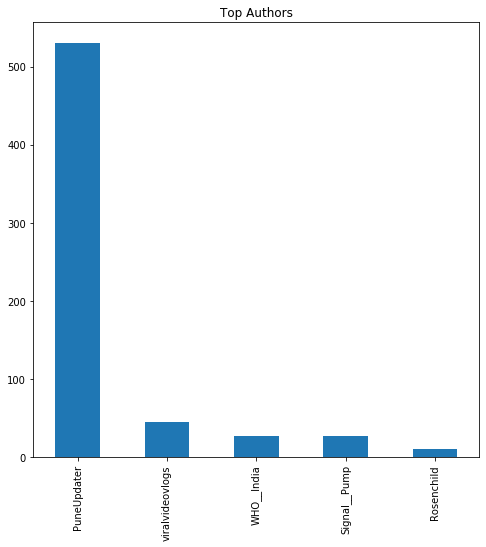

In [238]:
top_ten_authors.plot(kind="bar", title="Top Authors", figsize=[8, 8])

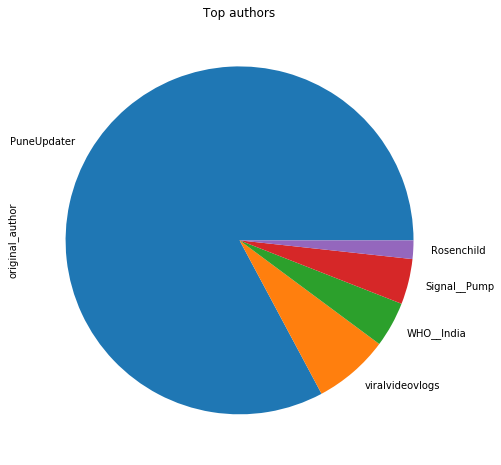

In [239]:
top_ten_authors.plot(kind="pie", title="Top authors", figsize=[8, 8])

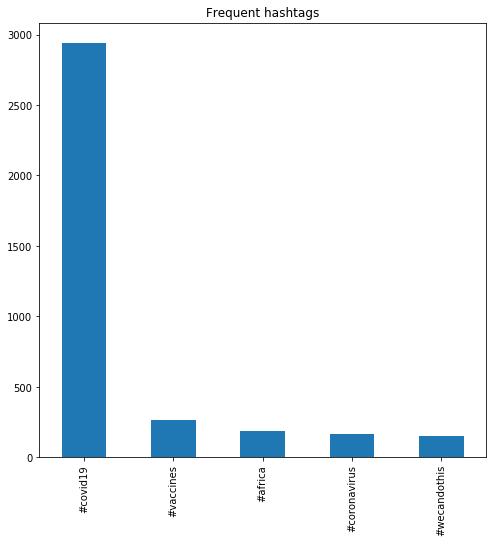

In [240]:
top_ten_hash_tags_used.plot(kind="bar", title="Frequent hashtags", figsize=[8, 8])

In [241]:
clean_text_df = pd.DataFrame(cleaned_tweet_df['clean_text'])
clean_text_df.dropna(inplace=True)
clean_text_df


,clean_text
0,"🚨africa is ""in the midst of a full-blown third..."
1,"dr moeti is head of who in africa, and one of ..."
2,thank you for creating this amazing campaign ...
3,"former pfizer vp and virologist, dr. michael y..."
4,i think it’s important that we don’t sell cova...
...,...
6527,rt : zweli please just release the graphic des...
6528,"former pfizer vp and virologist, dr. michael y..."
6529,"respectfully, veterinarians have to have a b..."
6530,"""africa needs millions more doses here &amp; n..."


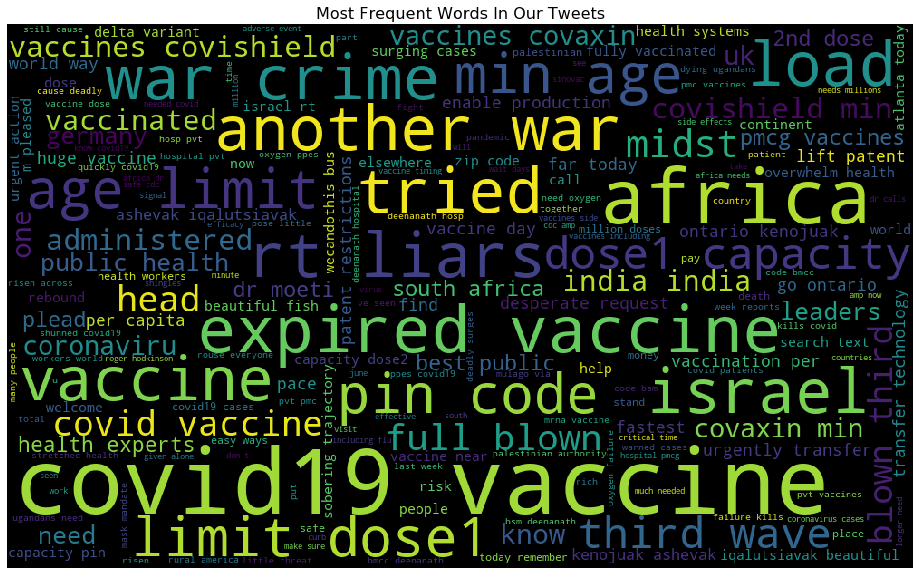

In [242]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(clean_text_df.clean_text)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()